In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# For analysis process we have to import dataset fro out system, we'll use pandas librery to import the csv file.

data = pd.read_csv(r'D:\Datasets\Crime Data\crime_dataset_india.csv')
data

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [4]:
# Before proceeding tothe analysis let's take some observation of the dataset and get some info anout it.
# In first step we'll check number of missiong/null values. 
data.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [6]:
#As we can see there are some errors in data type like dates are in object datatype.
# Change some datatypes according to use cases i.e. dates...

sns.set(style='whitegrid')
data['Date Reported'] = pd.to_datetime(data['Date Reported'], errors='coerce')
data['Date of Occurrence'] = pd.to_datetime(data['Date of Occurrence'], errors='coerce')
data['Date Case Closed'] = pd.to_datetime(data['Date Case Closed'], errors='coerce')

C:\Users\Poshan\AppData\Local\Temp\ipykernel_1696\3931137644.py:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date Case Closed'] = pd.to_datetime(data['Date Case Closed'], errors='coerce')


In [7]:
# in this dataset we have colosed cases and unsolved cases. We'll make new column to know that in how many days case is being solved.
data['Case Solving Days'] = (data['Date Case Closed'] - data['Date Reported']).dt.days

### Analysis Process

#### Q. How efficient is the crime resolution process?  

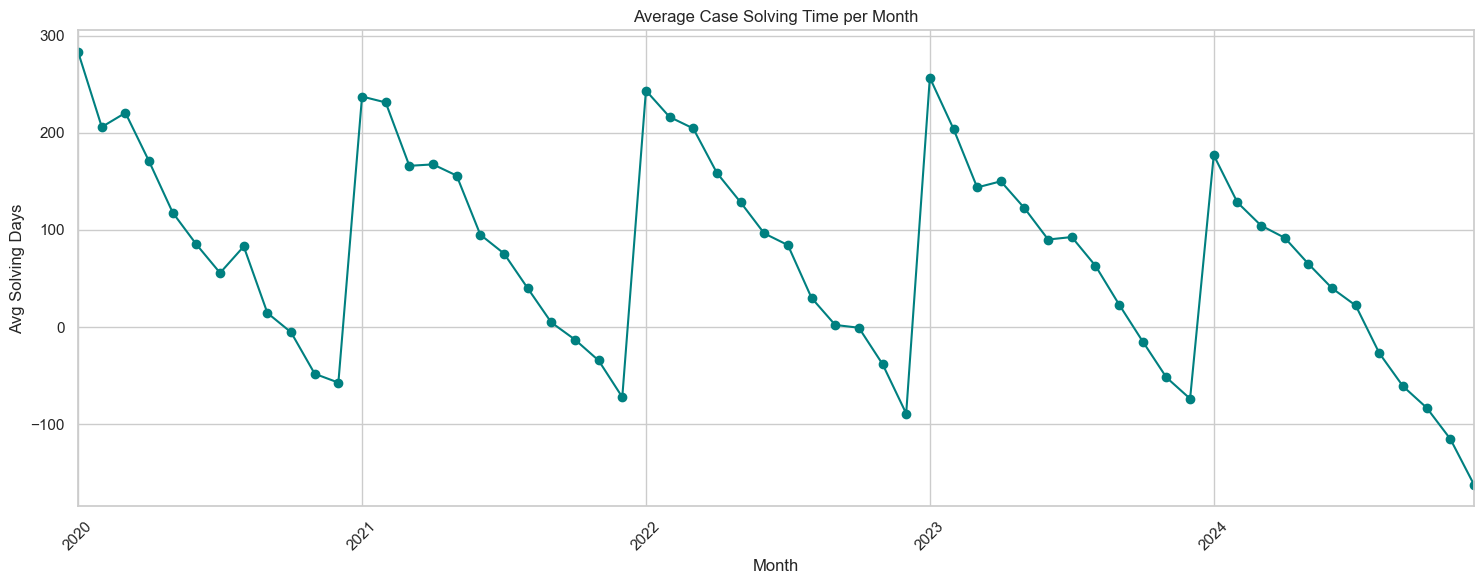

In [8]:
# Monthly trend analysis on Case solving time

data['Month Reported'] = data['Date Reported'].dt.to_period('M')
monthly_avg = data.groupby('Month Reported')['Case Solving Days'].mean().dropna()

monthly_avg.plot(figsize=(15,6), marker='o', color='teal')
plt.title('Average Case Solving Time per Month')
plt.ylabel('Avg Solving Days')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Above chart clearly represents that days to salve the cases are taking more time in year end then starting years.

#### Q. What type of crimes are most difficult to solve?

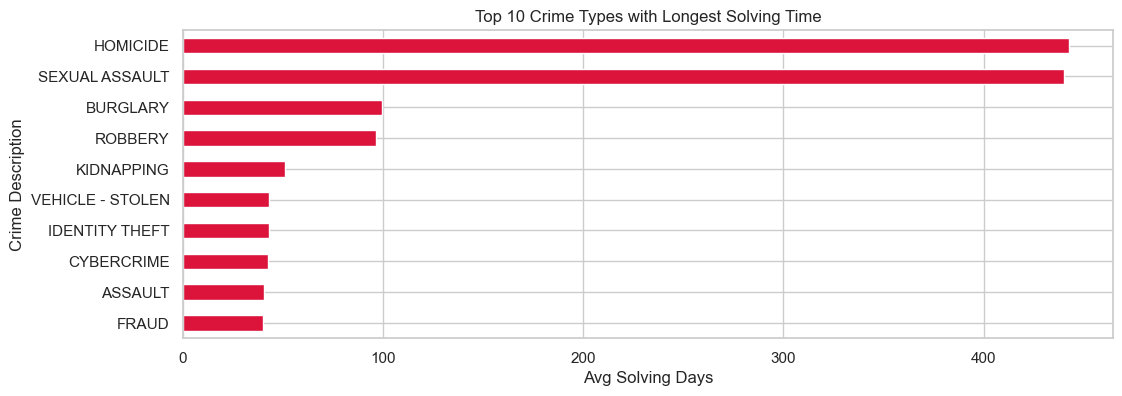

In [9]:
# Preapare data to know about which type of crime is being solved in shorter or longer time.
solving_by_crime = data.groupby('Crime Description')['Case Solving Days'].mean().sort_values(ascending=False).head(10)

# Plot the chart to visualize the difficulty of solving the case by their type in terms of avg. solving days.
solving_by_crime.plot(figsize=(12,4), kind='barh', color='crimson' )
plt.title('Top 10 Crime Types with Longest Solving Time')
plt.xlabel('Avg Solving Days')
plt.gca().invert_yaxis()
plt.show()

##### This chart states that HOMICIDE & SEXUAL ASSAUL are mosre difficult to sove compaired to others.

#### Q. Does victim age impact crime type or closure?

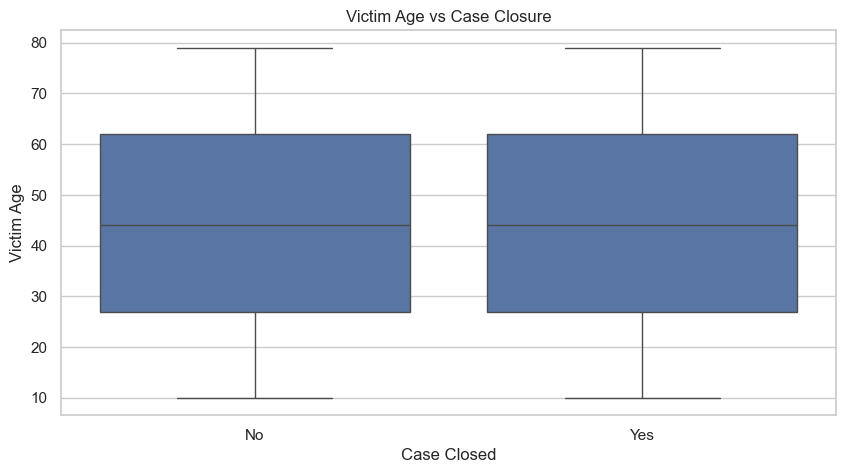

In [10]:
# Visualize the Victime age vs Crime type to know the impact on crimes.  
plt.figure(figsize=(10,5))
sns.boxplot(x='Case Closed', y='Victim Age', data=data)
plt.title('Victim Age vs Case Closure')
plt.show()

##### From this boxplot it is visible that there is no impact on crime closure in both closed and non closed cases. 

#### Q. Is there any relation on weapon used for crime into sloving the cases?

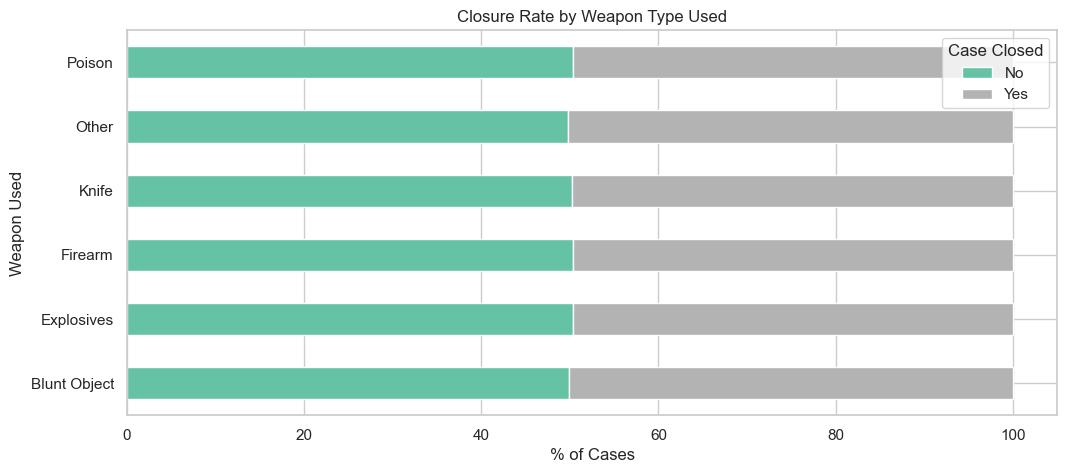

In [11]:
# Firstly call the data of weapon used for the crime which case has been closed
weapon_closure = pd.crosstab(data['Weapon Used'], data['Case Closed'], normalize='index') * 100

# Visualize the results in bar graph
weapon_closure.plot(kind='barh', stacked=True, figsize=(12,5), colormap='Set2')
plt.title('Closure Rate by Weapon Type Used')
plt.xlabel('% of Cases')
plt.legend(title='Case Closed')
plt.show()


##### There is no impactful difference on weapon used. In all weapons, around 50% of cases has been solved

#### Q. City wise crime landscape

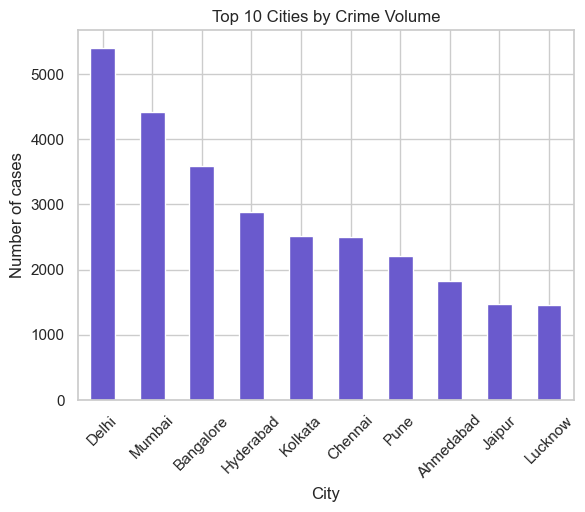

In [12]:
# Top cities by number of crime
top_cities = data['City'].value_counts().head(10)

# Visualize the top 10 cities according to number of crimes
top_cities.plot(kind='bar', color='slateblue')
plt.title('Top 10 Cities by Crime Volume')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)
plt.show()

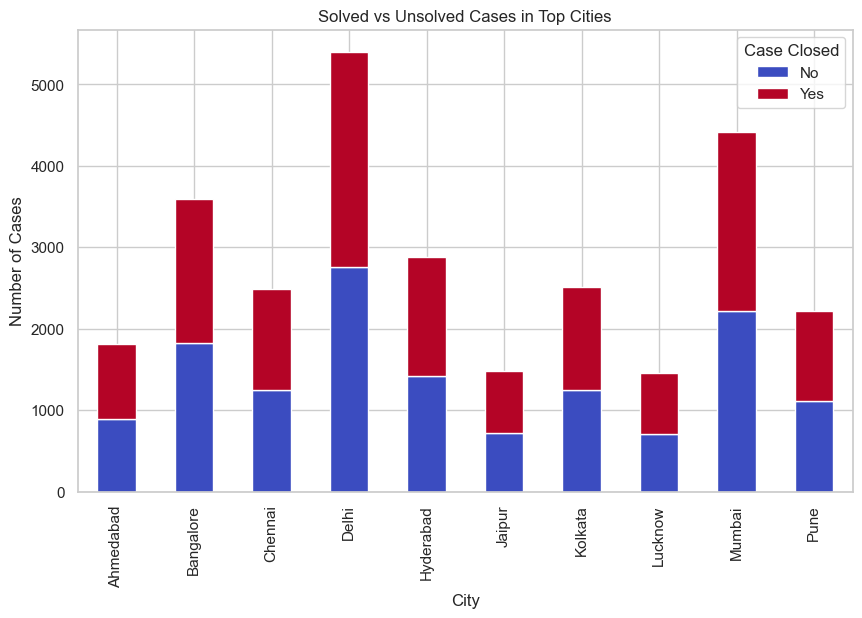

In [13]:
# Compare closure rate in top cities

top_cities_list=top_cities.index.tolist()
city_closure_rate = data[data['City'].isin(top_cities_list)].groupby(['City','Case Closed']).size().unstack().fillna(0)

city_closure_rate.plot(figsize=(10,6), kind='bar', stacked=True, colormap='coolwarm')
plt.title('Solved vs Unsolved Cases in Top Cities')
plt.ylabel('Number of Cases')
plt.show()

##### Above two graphs represents the top 10 cities according to number of crime case reported and case closing rate.

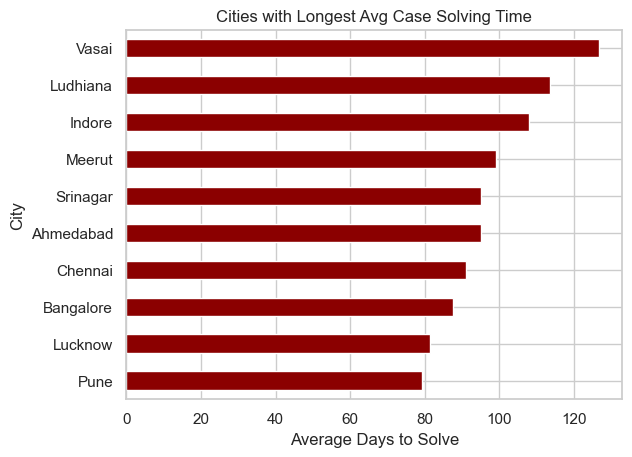

In [14]:
# Cities with longest average solving time

city_solving_time = data.groupby('City')['Case Solving Days'].mean().sort_values(ascending=False).head(10)

city_solving_time.plot(kind = 'barh' , color = 'darkred')
plt.title('Cities with Longest Avg Case Solving Time')
plt.xlabel('Average Days to Solve')
plt.gca().invert_yaxis()
plt.show()

#### Q. Crime trends over time

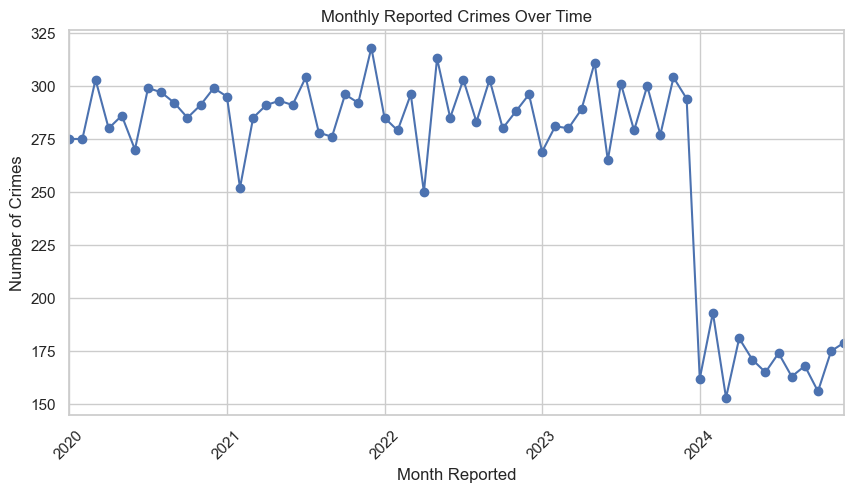

In [15]:
# Crime reported per month
monthly_crimes = data.groupby('Month Reported').size()

# Visualization of number of crime reported per month
monthly_crimes.plot(marker='o' , figsize=(10,5))
plt.title('Monthly Reported Crimes Over Time')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

##### It represents, criem rate is higher in last quarter year and then it suddenly drops in in first month of year.

#### Q. Is crime more common during specific hours?

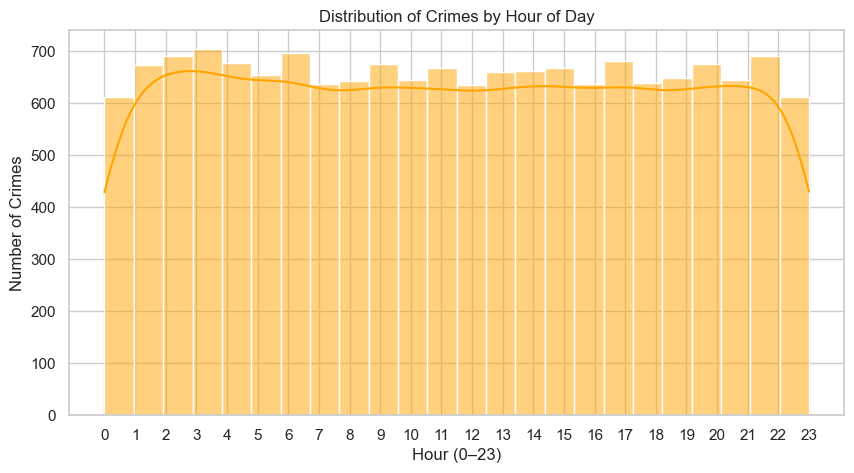

In [16]:
# Extract the crime occurrence hours/time
data['Hour of Occurrence'] = pd.to_datetime(data['Time of Occurrence'], errors='coerce').dt.hour

# Visulization of crime trend on specific hours.
plt.figure(figsize=(10,5))
sns.histplot(data['Hour of Occurrence'].dropna() , bins = 24, color = 'orange' , kde=True)
plt.title('Distribution of Crimes by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))
plt.show()

##### In above visualization a straight line represents the no relation on crime hour on thier numbers but the line's edges are down at few houre which represents the low crime reported for few hours in midnight 

#### Q. Is more police development helping to solve the case ?

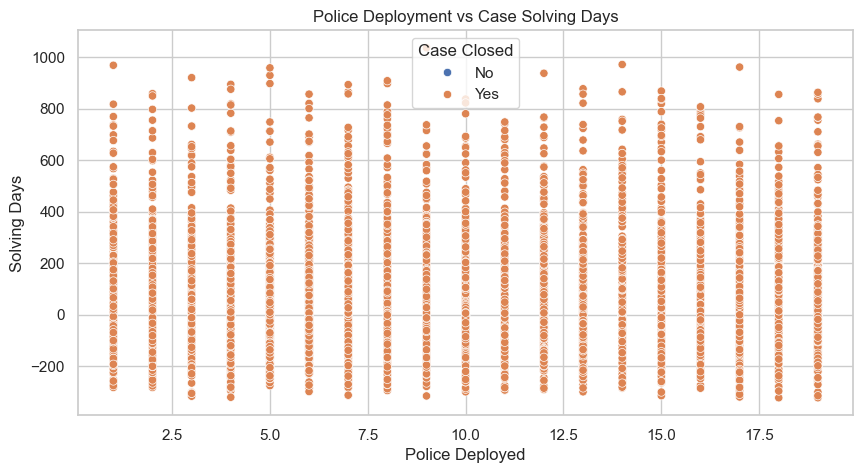

In [17]:
# Visuaization on Police deployed vs Csse solving days
plt.figure(figsize=(10,5))
sns.scatterplot(x='Police Deployed' , y='Case Solving Days', data=data, hue='Case Closed')
plt.title('Police Deployment vs Case Solving Days')
plt.xlabel('Police Deployed')
plt.ylabel('Solving Days')
plt.show()

##### There  is no such relation on deployed police on case solving days.

#### Q. Which domain of crime is hardest to solve?

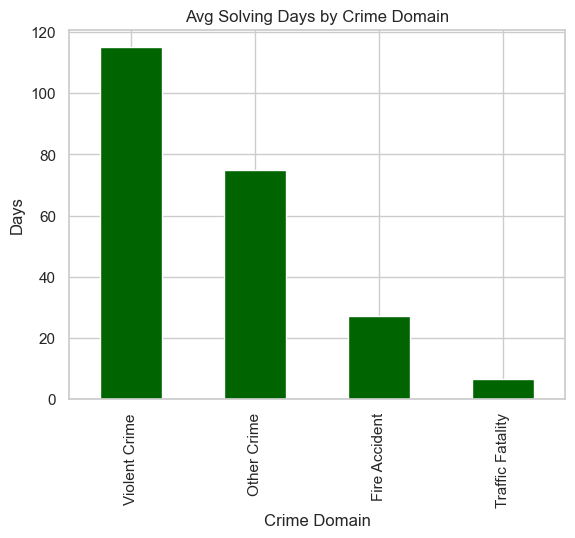

In [18]:
# Filter the data for crime domains and case solving days. 

domain_solved = data.groupby('Crime Domain')['Case Solving Days'].mean().sort_values(ascending=False)

# Visulalization for case solved domains and their average cse solving days.
domain_solved.plot(kind = 'bar' , color = 'darkgreen')
plt.title('Avg Solving Days by Crime Domain')
plt.ylabel('Days')
plt.show()

#### Q. Do crimes against different gender shows different patterns?

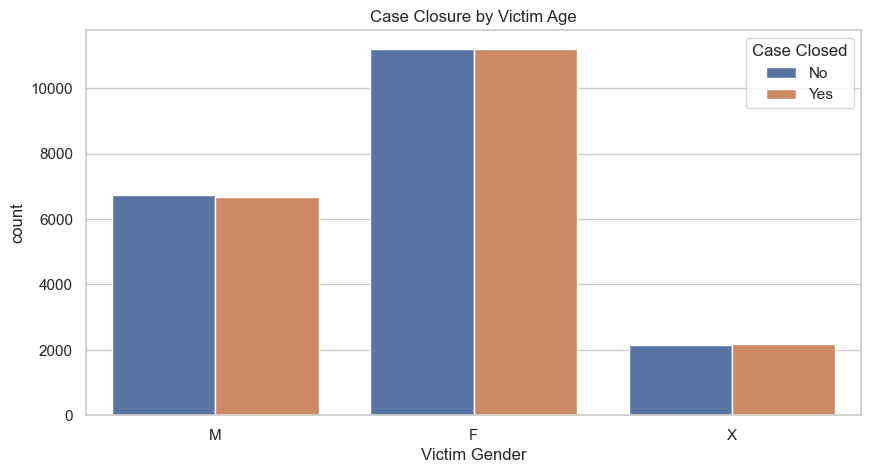

In [19]:
## Visualize the pattern through countplot.

plt.figure(figsize=(10,5))
sns.countplot(data=data , x = 'Victim Gender', hue = 'Case Closed')
plt.title('Case Closure by Victim Age')
plt.show()

##### Above graph is shwing they femaes are facing tee highest number of crimes compaire to others.

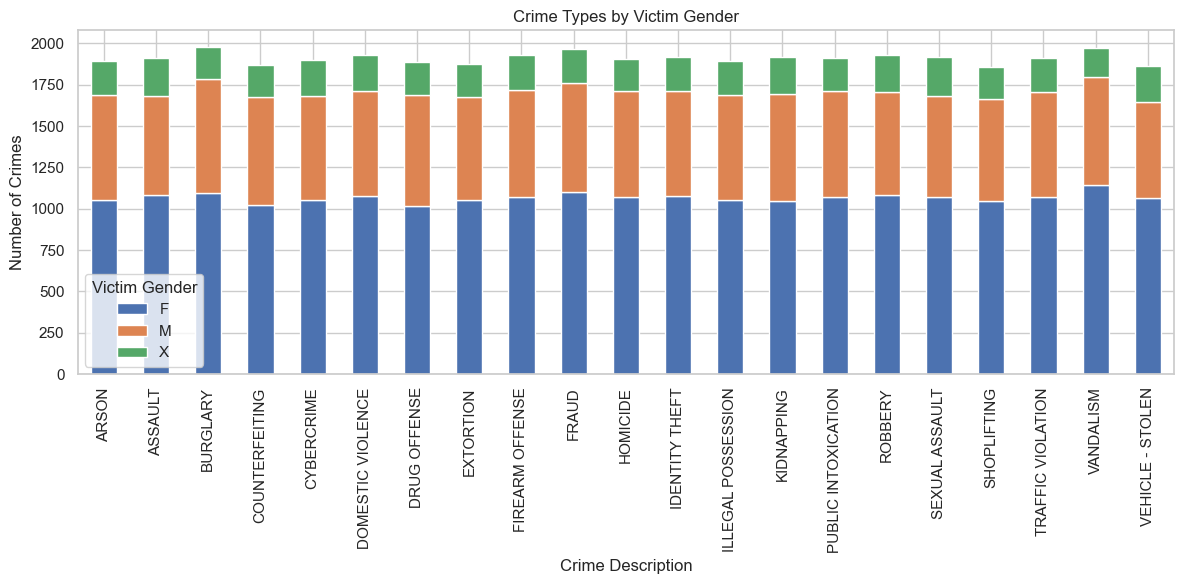

In [20]:
# We can also look for type of crime for each gender

gender_crimes = data.groupby(['Victim Gender', 'Crime Description']).size().unstack().fillna(0)
gender_crimes.T.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Crime Types by Victim Gender')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

#### Q. Most used  weapons

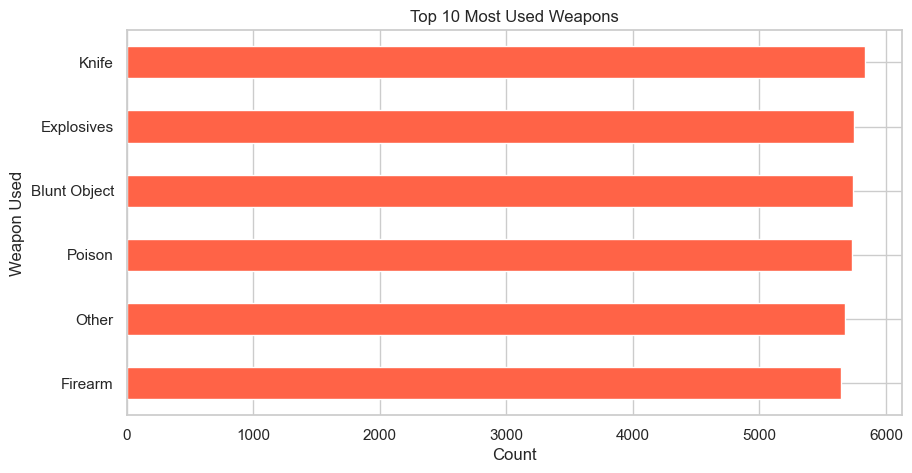

In [21]:
# Count the number of cases for each weapon type used in crime.
weapons_count = data['Weapon Used'].value_counts().head(10)

# Visualization
weapons_count.plot(figsize = (10,5), kind = 'barh' , color = 'tomato')
plt.title('Top 10 Most Used Weapons')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

#### Q. Top unsolved crime types

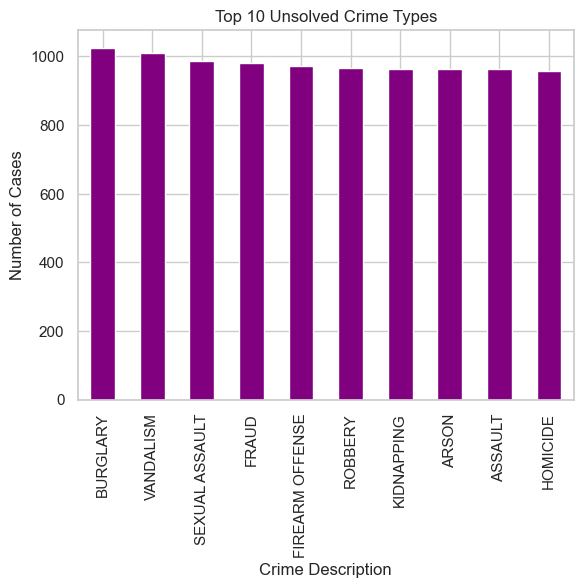

In [22]:
## Listing the top 10 unsolved cases 

unsolved = data[data['Case Closed'] == 'No']
top_unsolved_crime = unsolved['Crime Description'].value_counts().head(10)

# Visualization
top_unsolved_crime.plot(kind = 'bar', color = 'purple')
plt.title('Top 10 Unsolved Crime Types')
plt.ylabel('Number of Cases')
plt.show()

#### Q. Crime Complesicity vs Resolution

In [23]:

## Let's define a "Complex Case" as one that took more then 60 days to solve

data['Complax Case'] = data['Case Solving Days'] > 60

complex_rate = data['Complax Case'].value_counts(normalize=True)*100
print("Complecx Case Rate: \n" , complex_rate)

Complecx Case Rate: 
 Complax Case
False    90.234064
True      9.765936
Name: proportion, dtype: float64


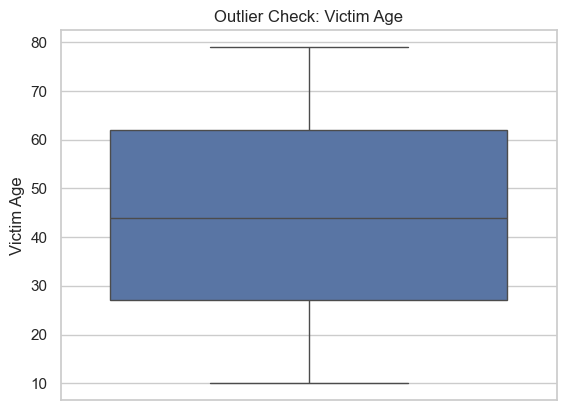

Age stats:
 count    40160.00000
mean        44.49126
std         20.22555
min         10.00000
25%         27.00000
50%         44.00000
75%         62.00000
max         79.00000
Name: Victim Age, dtype: float64


In [24]:
sns.boxplot(data['Victim Age'])
plt.title('Outlier Check: Victim Age')
plt.show()

print("Age stats:\n", data['Victim Age'].describe())

### Predictive Modeling

#### We'll  build a model that can predict whether a case will be solved or not

In [25]:
# Load the required libreries.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
# we'll clean and prepare the dataset for modeling.

# Drom rows with missing values
df = data.dropna(subset=['Case Closed'])

# Encode target variable
df['Case Closed']= df['Case Closed'].map({'Yes':1, 'No':0})

# Select features (drop unnecessary or ID/timr based columns )
features = df[['City', 'Crime Code', 'Victim Age', 'Victim Gender', 'Weapon Used',
               'Crime Domain', 'Police Deployed', 'Case Solving Days']].copy()



In [27]:
# Encode categorical variables
for col in ['City', 'Victim Gender', 'Weapon Used','Crime Domain']:
    features[col] = features[col].astype(str)
    features[col] = LabelEncoder().fit_transform(features[col])

# Fill missing numerical values
features = features.fillna(features.mean())

# Final target
target = df['Case Closed']

In [28]:
# Split the data into test and train models

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [29]:
# Train the random forest model

model1 = RandomForestClassifier(n_estimators=100 , random_state=42)
model1.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Evaluate the model for predictions
y_pred = model1.predict(x_test)

print("Classification report: \n" , classification_report(y_test, y_pred))
print("Confusion Matrix: \n" , confusion_matrix(y_test , y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.85      0.72      4046
           1       0.76      0.48      0.59      3986

    accuracy                           0.67      8032
   macro avg       0.69      0.67      0.66      8032
weighted avg       0.69      0.67      0.66      8032

Confusion Matrix: 
 [[3459  587]
 [2076 1910]]


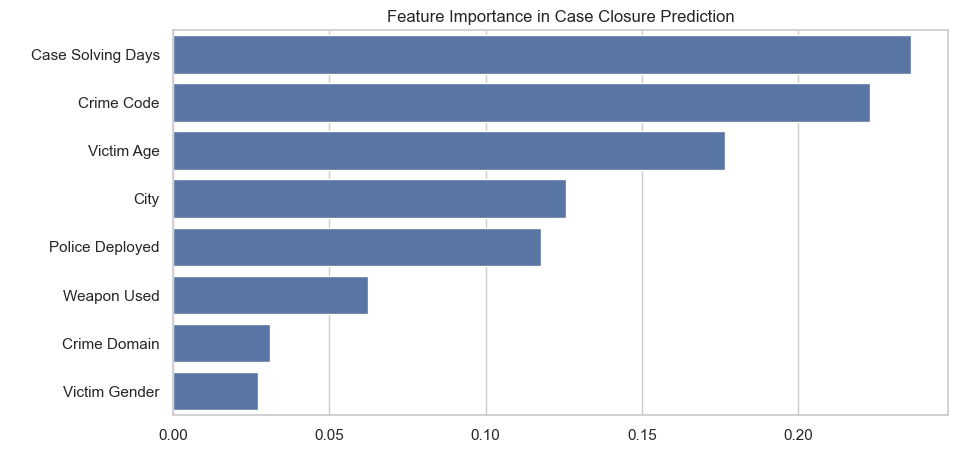

In [31]:
# Visualize the feature importance
feature_importances = pd.Series(model1.feature_importances_, index=features.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance in Case Closure Prediction')
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

##### This bar chart shows how much each feature contributes to predicting whether a case will be closed. The larger the bar, the more influence that feature has on the model’s prediction.